### Functions

In [1]:
def find_not_matching(list1, list2):
    ''' Takes two lists and finds any strings that don't match in each of them.
    Returns the list not matching from first list, list not matching from second list, 
    and entire list of all not matching.'''
    
    # Find elements that are in list1 but not in list2
    not_matching_in_list2 = set(list1) - set(list2)

    # Find elements that are in list2 but not in list1
    not_matching_in_list1 = set(list2) - set(list1)

    # Combine both sets of non-matching elements
    all_not_matching = not_matching_in_list1.union(not_matching_in_list2)

    return not_matching_in_list2, not_matching_in_list1, all_not_matching

In [2]:
def string_parsing(list):
    ''' Standardizes parsing of strings. Removes hyphens, replaces spaces with underscores. 
    Strips whitespace from front and end of string. '''
    
    # Variable to return later
    arr = []

    # Loop over all elements. Strip whitespace on left and right, replace hyphen with '', replace spaces with '_'
    for i in range(len(list)):
        temp = list[i]
        if temp is not None and type(temp) is not int and str(temp) != 'nan' and type(temp) is not int and type(temp) is not float:
            temp = temp.lstrip()
            temp = temp.rstrip()
            temp = temp.lower().replace('-', ' ').replace(' ', '_').replace('__', '_')
        arr.append(temp)

    return arr

In [3]:
def string_parsing_word(word):
    ''' Standardizes parsing of a single strings Removes hyphens, replaces spaces with underscores. 
    Strips whitespace from front and end of string. '''
    
    if word is not None and str(word) != 'nan' and type(word) is not int:
        word = word.lstrip()
        word = word.rstrip()
        word = word.lower().replace('-', ' ').replace(' ', '_').replace('__', '_')
    
    return word

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import graphviz
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from math import sqrt

# Disable pandas warning
pd.options.mode.chained_assignment = None

# Display max rows / columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Add disease rate information to original dataset

In [5]:
# Clean original dataset creating consistent naming for diseases and symptoms
df = pd.read_csv('dataset.csv')

# Standardize text formatting
df = df.apply(string_parsing)

# Setup columns to be symptoms
symptoms = []

for cols in df.columns:
    if cols != 'Disease':
        symptoms.append(df[cols].unique().tolist())
    
symptom_list = sum(symptoms, [])
unique_symptoms = set(symptom_list)
unique_symptoms = [x for x in unique_symptoms if str(x) != 'nan']
unique_symptoms = string_parsing(unique_symptoms)

cleaned_df = pd.DataFrame(columns=unique_symptoms)

cleaned_df['Disease'] = df['Disease'].copy()

for index,row in df.iloc[1:].iterrows():
    for col in df.columns[1:]:
        value = row[col]
        if(str(value) != 'nan'):
            cleaned_df[value][index] = 1

cleaned_df = cleaned_df.fillna(0)

In [6]:
cleaned_df.head()

,vomiting,runny_nose,small_dents_in_nails,polyuria,red_spots_over_body,mucoid_sputum,blood_in_sputum,pain_during_bowel_movements,yellowish_skin,breathlessness,brittle_nails,phlegm,chills,anxiety,belly_pain,hip_joint_pain,skin_peeling,mood_swings,nodal_skin_eruptions,muscle_wasting,fluid_overload,stiff_neck,yellow_urine,weight_gain,abdominal_pain,lack_of_concentration,knee_pain,slurred_speech,neck_pain,muscle_weakness,red_sore_around_nose,mild_fever,restlessness,inflammatory_nails,fatigue,cough,sunken_eyes,obesity,depression,ulcers_on_tongue,swelled_lymph_nodes,dark_urine,muscle_pain,weakness_of_one_body_side,cold_hands_and_feets,high_fever,enlarged_thyroid,abnormal_menstruation,distention_of_abdomen,foul_smell_of_urine,acidity,internal_itching,blurred_and_distorted_vision,fast_heart_rate,dizziness,congestion,pain_in_anal_region,joint_pain,bruising,headache,stomach_pain,swollen_extremeties,redness_of_eyes,loss_of_balance,spotting_urination,dehydration,unsteadiness,burning_micturition,weakness_in_limbs,blackheads,lethargy,stomach_bleeding,altered_sensorium,increased_appetite,cramps,swollen_blood_vessels,drying_and_tingling_lips,toxic_look_(typhos),diarrhoea,spinning_movements,back_pain,rusty_sputum,watering_from_eyes,puffy_face_and_eyes,painful_walking,continuous_feel_of_urine,history_of_alcohol_consumption,indigestion,constipation,bladder_discomfort,palpitations,passage_of_gases,receiving_unsterile_injections,shivering,silver_like_dusting,bloody_stool,sweating,extra_marital_contacts,throat_irritation,loss_of_smell,skin_rash,swelling_joints,sinus_pressure,irregular_sugar_level,swollen_legs,pain_behind_the_eyes,irritation_in_anus,swelling_of_stomach,coma,weight_loss,blister,chest_pain,yellow_crust_ooze,visual_disturbances,scurring,prominent_veins_on_calf,loss_of_appetite,dischromic_patches,pus_filled_pimples,irritability,receiving_blood_transfusion,yellowing_of_eyes,family_history,malaise,continuous_sneezing,patches_in_throat,itching,nausea,movement_stiffness,excessive_hunger,acute_liver_failure,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,fungal_infection
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,fungal_infection
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,fungal_infection


## Clean alt dataset creating consistent naming for diseases and symptoms

In [7]:
# Load up dataset with disease rate data
df_sev = pd.read_csv('dataset_files/Symptom-severity.csv')
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
# Update names to match those in og
# Define strings to replace
string_replace = {'foul_smell_ofurine' : 'foul_smell_of_urine'
                 }

# Replace strings in dataframe
df_sev = df_sev.replace(string_replace)

df_sev.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [9]:
# Multiply severity rating ("weight") column with matching column in og dataframe
df_sev = df_sev[df_sev['Symptom'] != 'prognosis']

for index, row in df_sev.iloc[1:].iterrows():
    symptom = row[0]
    weight = row[1]
    cleaned_df[symptom] = cleaned_df[symptom] * weight 
    
cleaned_df.head()

,vomiting,runny_nose,small_dents_in_nails,polyuria,red_spots_over_body,mucoid_sputum,blood_in_sputum,pain_during_bowel_movements,yellowish_skin,breathlessness,brittle_nails,phlegm,chills,anxiety,belly_pain,hip_joint_pain,skin_peeling,mood_swings,nodal_skin_eruptions,muscle_wasting,fluid_overload,stiff_neck,yellow_urine,weight_gain,abdominal_pain,lack_of_concentration,knee_pain,slurred_speech,neck_pain,muscle_weakness,red_sore_around_nose,mild_fever,restlessness,inflammatory_nails,fatigue,cough,sunken_eyes,obesity,depression,ulcers_on_tongue,swelled_lymph_nodes,dark_urine,muscle_pain,weakness_of_one_body_side,cold_hands_and_feets,high_fever,enlarged_thyroid,abnormal_menstruation,distention_of_abdomen,foul_smell_of_urine,acidity,internal_itching,blurred_and_distorted_vision,fast_heart_rate,dizziness,congestion,pain_in_anal_region,joint_pain,bruising,headache,stomach_pain,swollen_extremeties,redness_of_eyes,loss_of_balance,spotting_urination,dehydration,unsteadiness,burning_micturition,weakness_in_limbs,blackheads,lethargy,stomach_bleeding,altered_sensorium,increased_appetite,cramps,swollen_blood_vessels,drying_and_tingling_lips,toxic_look_(typhos),diarrhoea,spinning_movements,back_pain,rusty_sputum,watering_from_eyes,puffy_face_and_eyes,painful_walking,continuous_feel_of_urine,history_of_alcohol_consumption,indigestion,constipation,bladder_discomfort,palpitations,passage_of_gases,receiving_unsterile_injections,shivering,silver_like_dusting,bloody_stool,sweating,extra_marital_contacts,throat_irritation,loss_of_smell,skin_rash,swelling_joints,sinus_pressure,irregular_sugar_level,swollen_legs,pain_behind_the_eyes,irritation_in_anus,swelling_of_stomach,coma,weight_loss,blister,chest_pain,yellow_crust_ooze,visual_disturbances,scurring,prominent_veins_on_calf,loss_of_appetite,dischromic_patches,pus_filled_pimples,irritability,receiving_blood_transfusion,yellowing_of_eyes,family_history,malaise,continuous_sneezing,patches_in_throat,itching,nausea,movement_stiffness,excessive_hunger,acute_liver_failure,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,fungal_infection
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,fungal_infection
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,fungal_infection


In [10]:
# Save dataset to file for use in model
cleaned_df.to_csv('Cleaned_original_dataset_add_symptom_severity.csv',index=False)

In [11]:
# Create and run model on updated dataset
unique_values = cleaned_df['Disease'].unique()
le = LabelEncoder()
le.fit(unique_values)
cleaned_df['encoded_disease'] = le.transform(cleaned_df['Disease'])

X = cleaned_df.drop('Disease',axis=1)
X = X.drop('encoded_disease',axis=1)
y = cleaned_df['encoded_disease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0.001)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy*100}%')

feature_names = X.columns.tolist()
target_names = cleaned_df['Disease'].unique().tolist()
export_graphviz(decision_tree_model, out_file='decision_tree_classifier_severity_weighted.dot', 
                feature_names=feature_names, class_names=target_names, filled=True)

with open('decision_tree_classifier_severity_weighted.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('decision_tree_severity_weighted',view=False)

Image(filename='decision_tree_severity_weighted.png')

/var/folders/29/59_04ypd5n144glcd8qwhc6w0000gn/T/ipykernel_1984/2676395776.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_df['encoded_disease'] = le.transform(cleaned_df['Disease'])


Accuracy of the Decision Tree Classifier: 97.15447154471545%


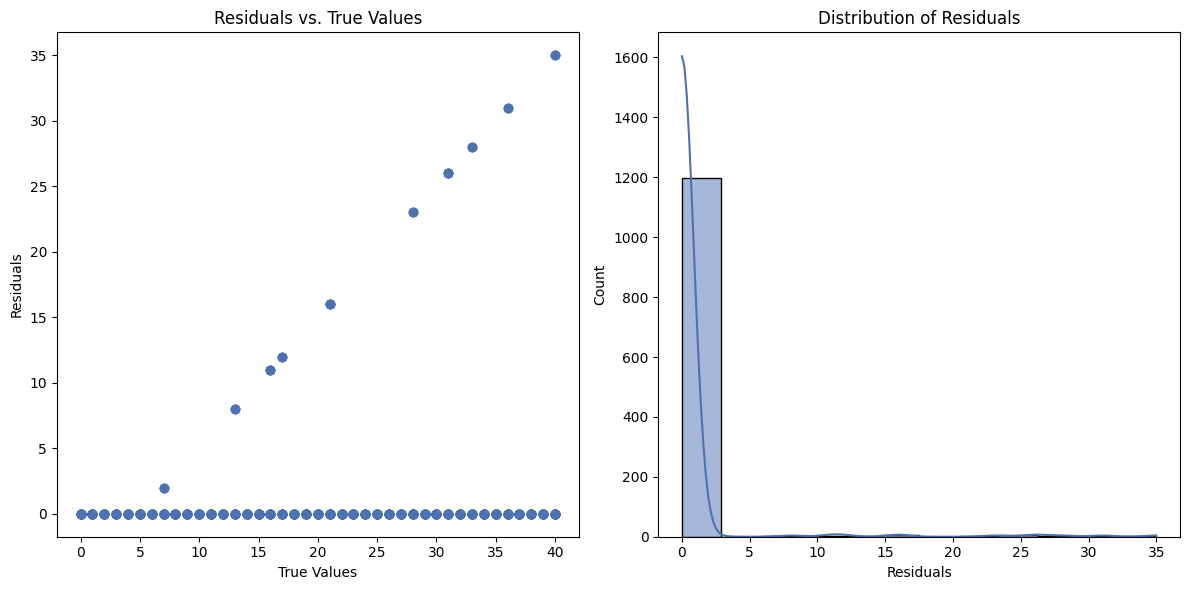

Mean Absolute Percentage Error (MAPE): 0.02%
Root Mean Squared Error (RMSE): 3.64


In [12]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [13]:
# Run data through logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)

print(f"Score for Logistic Regression:  {clf.score(X_test, y_test)*100}%")

Score for Logistic Regression:  100.0%


/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_clf_pred)}")

Confusion Matrix:
 [[28  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 29  0]
 [ 0  0  0 ...  0  0 30]]


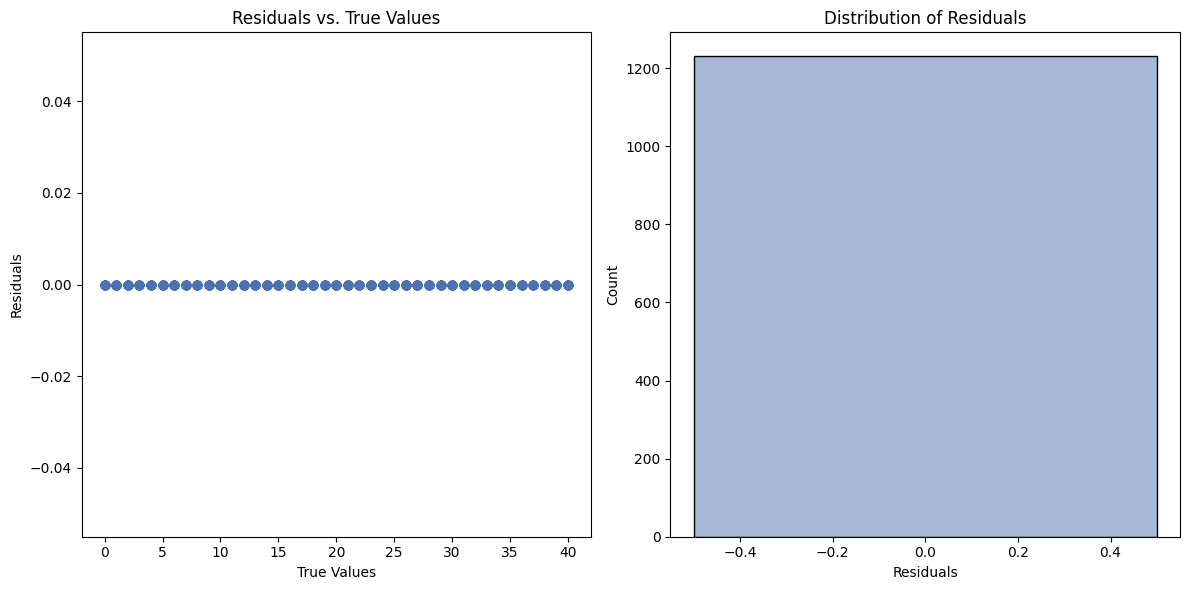

Mean Absolute Percentage Error (MAPE): 0.02%
Root Mean Squared Error (RMSE): 3.64


In [15]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_clf_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")